# Work with anndata (h5ad) files

If you are working with single-cell data using Python, you might be familiar with the `anndata`/`scanpy` package, which is commonly used to handle `.h5ad` files. This notebook provides a brief overview of how to visualize the data 

## Preparation


In [17]:
devtools::document()
devtools::load_all()

# download.file(
#     "https://github.com/theislab/scvelo_notebooks/raw/master/data/Pancreas/endocrinogenesis_day15.h5ad",
#     "./data/pancreas.h5ad",
#     mode = "wb"
# )
h5ad_file <- "./data/pancreas_velocity.h5ad"

ℹ Updating scplotter documentation


ℹ Loading scplotter
Writing NAMESPACE
Writing h5group_to_matrix.Rd
ℹ Loading scplotter


## Run scvelo pipline with python

In [130]:
python_script <- "
import scanpy as sc
import scvelo as scv

adata = sc.read_h5ad('./data/pancreas.h5ad')
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000, log=True)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata)
scv.tl.velocity_embedding(adata, basis='pca')

adata.write('./data/pancreas_velocity.h5ad')
"

if (!file.exists("./data/pancreas_velocity.h5ad")) {
    reticulate::py_run_string(python_script)
}

## Plot using CellDimPlot

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”


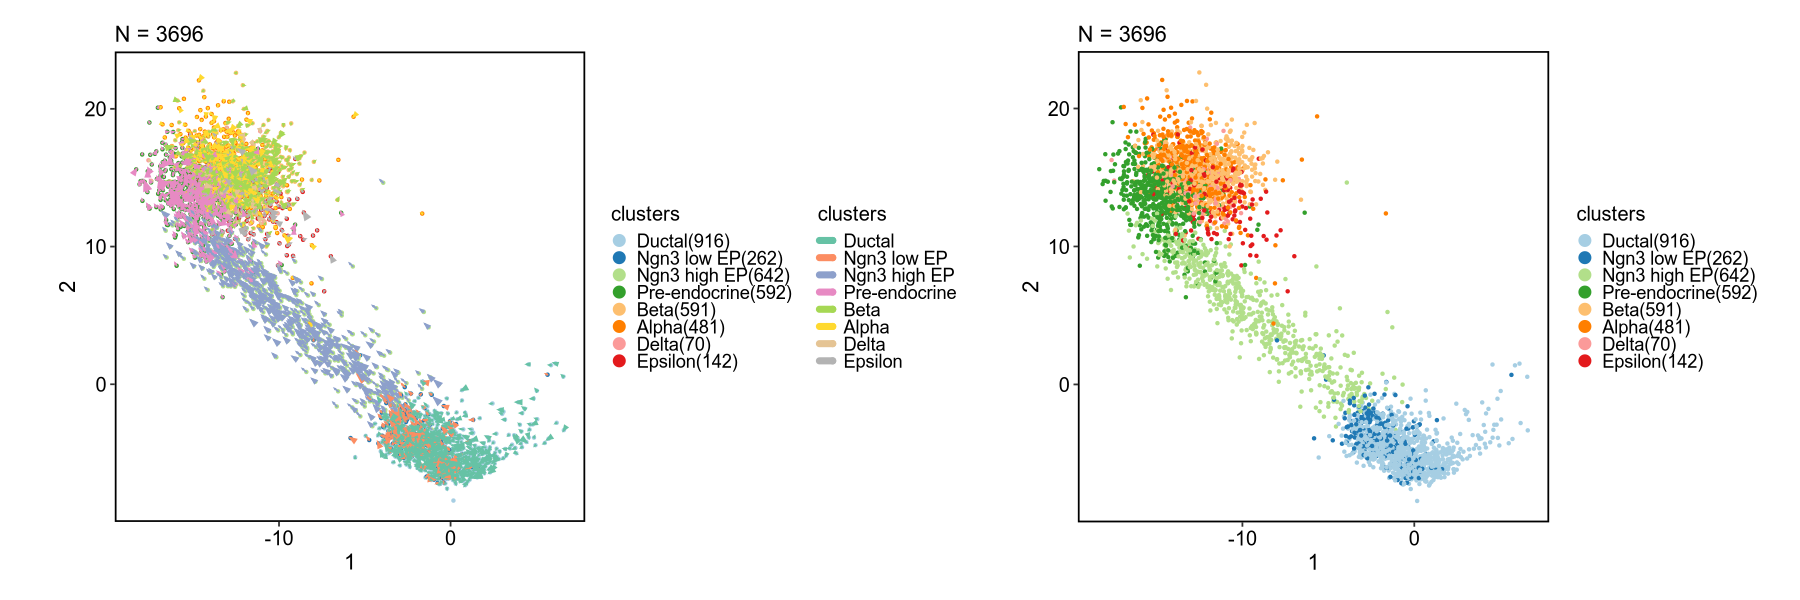

In [131]:
options(repr.plot.width = 15, repr.plot.height = 5)

p1 <- CellDimPlot(h5ad_file, reduction = "pca", velocity = "velocity_pca",
    group_by = "clusters")
p2 <- CellDimPlot(h5ad_file, reduction = "pca", group_by = "clusters")

p1 + p2

## Visualize networks

ℹ Loading scplotter


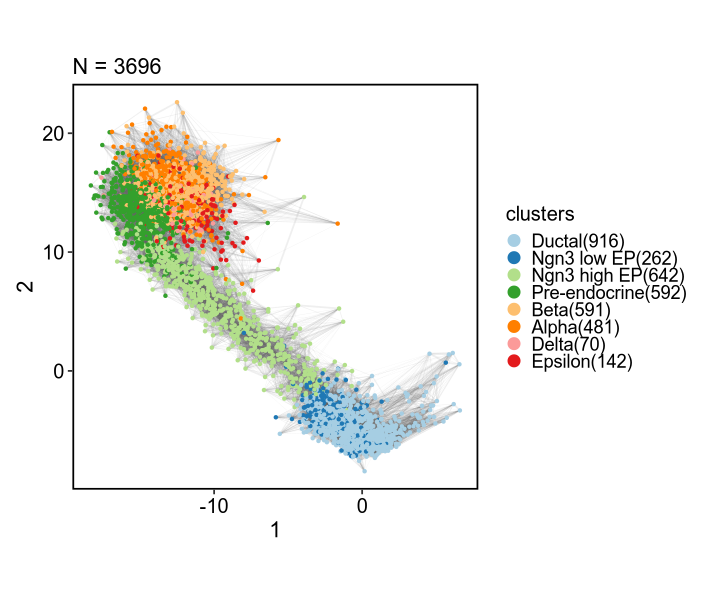

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)

CellDimPlot(h5ad_file, group_by = "clusters", graph = TRUE)

# You can also:
# f <- hdf5r::H5File$new(h5ad_file, mode = "r")
# CellDimPlot(f, group_by = "clusters", graph = TRUE)
# f$close_all()

## Visualize velocity using CellVelocityPlot

ℹ Loading scplotter


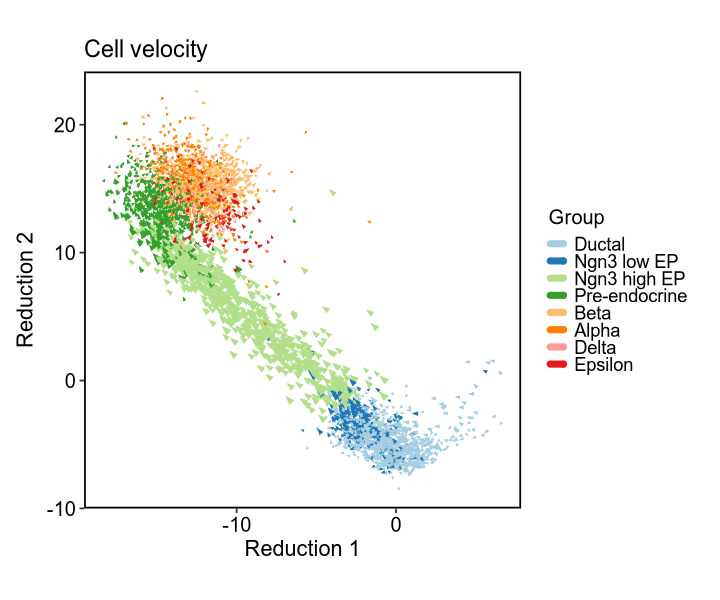

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)

CellVelocityPlot(h5ad_file, group_by = "clusters", reduction = "pca",
    v_reduction = "velocity_pca")

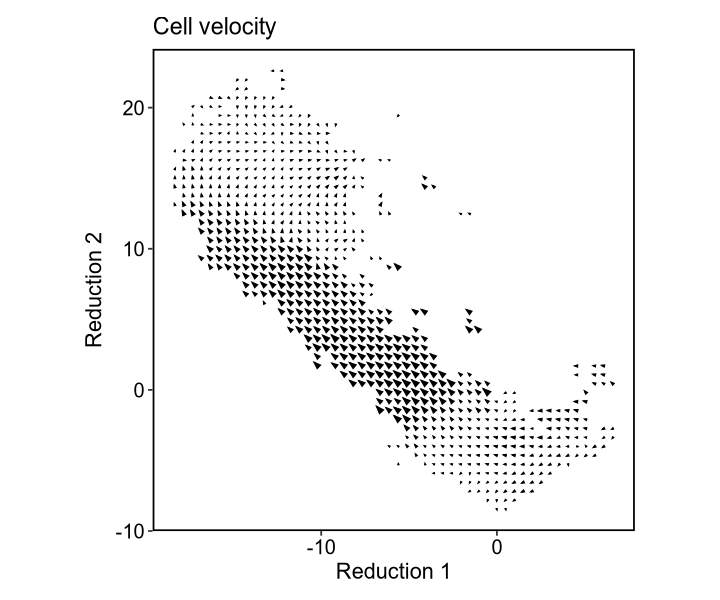

In [144]:
options(repr.plot.width = 6, repr.plot.height = 5)

CellVelocityPlot(h5ad_file, reduction = "pca",
    v_reduction = "velocity_pca", plot_type = "grid")

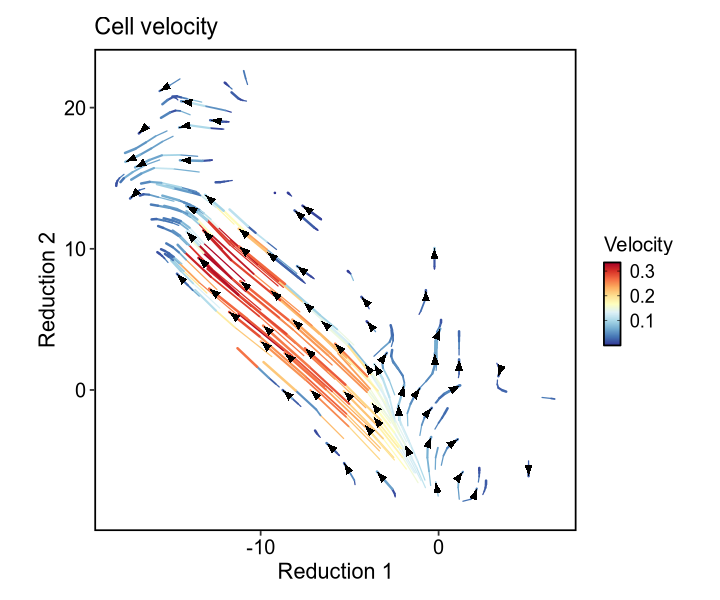

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)

CellVelocityPlot(h5ad_file, reduction = "pca",
    v_reduction = "velocity_pca", plot_type = "stream")

## Visualize cell statistics using CellStatsPlot

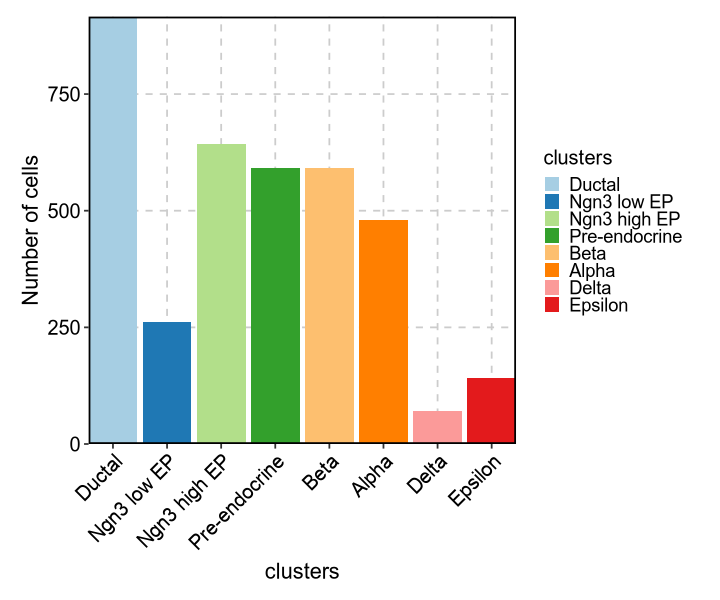

In [6]:
options(repr.plot.width = 6, repr.plot.height = 5)

CellStatPlot(h5ad_file, ident = "clusters", x_text_angle = 45)

## Visualize feature statistics using FeatureStatsPlot

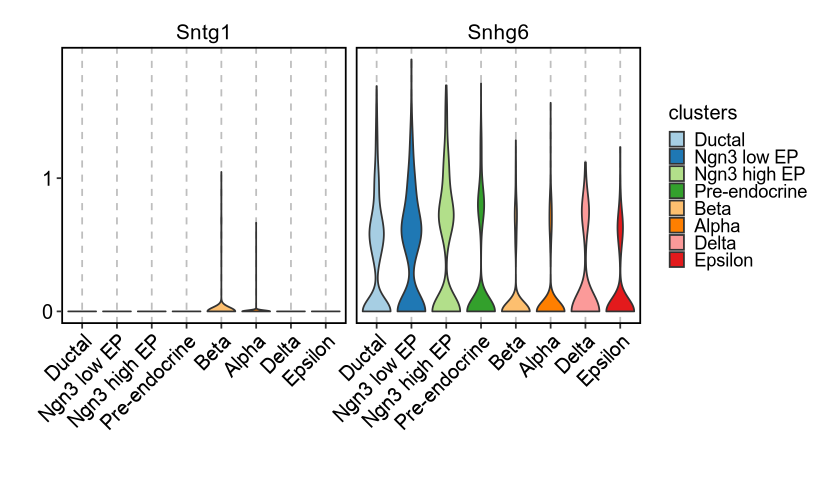

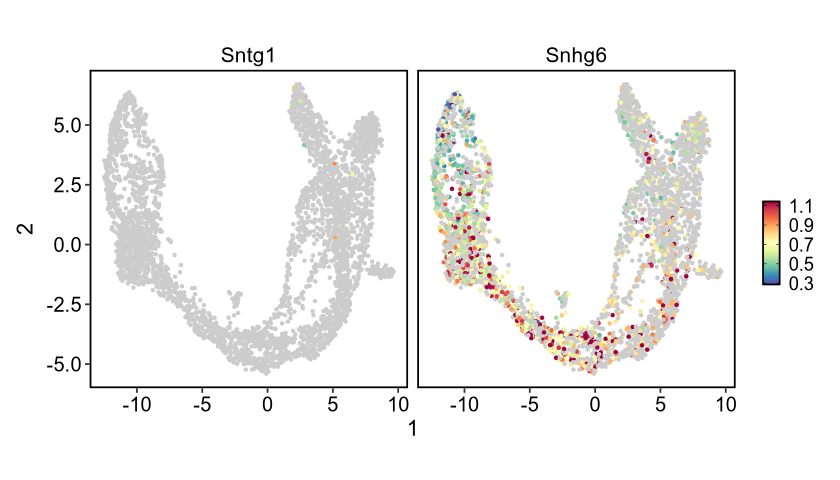

In [50]:
options(repr.plot.width = 7, repr.plot.height = 4)

FeatureStatPlot(h5ad_file, features = c('Sntg1', 'Snhg6'), ident = "clusters")
FeatureStatPlot(h5ad_file, features = c('Sntg1', 'Snhg6'), ident = "clusters",
    plot_type = "dim", upper_quantile = 0.9, reduction = "umap")